# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [6]:
# Extract all rows of data
table = soup.find('table', class_='table')
rows = table.find_all('tr')
headers = [header.get_text() for header in rows[0].find_all('th')]

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [7]:
# Create an empty list
data = []

# Loop through the scraped data to create a list of rows
for row in rows[1:]:
    columns = row.find_all('td')
    row_data = [col.get_text() for col in columns]
    data.append(row_data)

In [8]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_weather_df = pd.DataFrame(data, columns=headers)

In [9]:
# Confirm DataFrame was created successfully
mars_weather_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [10]:
# Examine data type of each column
mars_weather_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [11]:
# Change data types for data analysis
# Convert terrestrial_date to datetime
mars_weather_df['terrestrial_date'] = pd.to_datetime(mars_weather_df['terrestrial_date'])

# Convert numeric columns to appropriate types
mars_weather_df['sol'] = mars_weather_df['sol'].astype(int)
mars_weather_df['ls'] = mars_weather_df['ls'].astype(float)
mars_weather_df['month'] = mars_weather_df['month'].astype(int)
mars_weather_df['min_temp'] = mars_weather_df['min_temp'].astype(float)
mars_weather_df['pressure'] = mars_weather_df['pressure'].astype(float)

In [12]:
# Confirm type changes were successful by examining data types again
mars_weather_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                         float64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [14]:
# 1. How many months are there on Mars?
unique_months = mars_weather_df['month'].nunique()
unique_months

12

In [15]:
# 2. How many sols (Martian days) worth of data are there?
total_sols = mars_weather_df['sol'].nunique()
total_sols

1867

In [16]:
# 3. What is the average minimum temperature by month?
average_min_temp_by_month = mars_weather_df.groupby('month')['min_temp'].mean()
average_min_temp_by_month

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

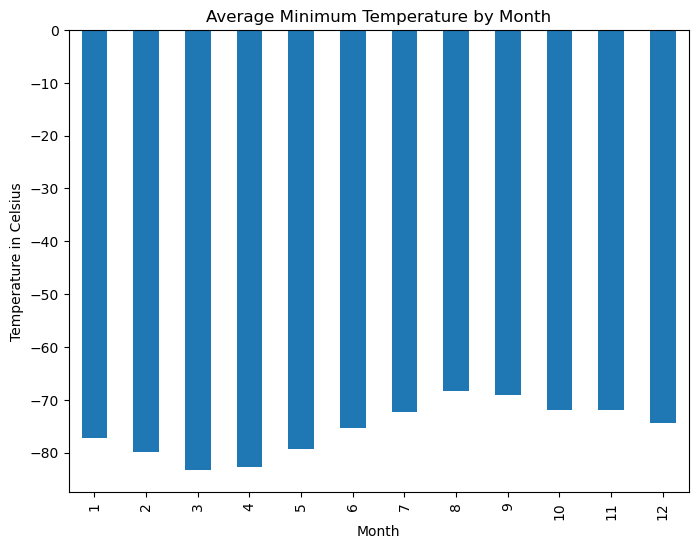

In [20]:
# Plot the average minimum temperature by month
plt.figure(figsize=(8,6))
average_min_temp_by_month.plot(kind='bar')
plt.title('Average Minimum Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Temperature in Celsius')
plt.show()

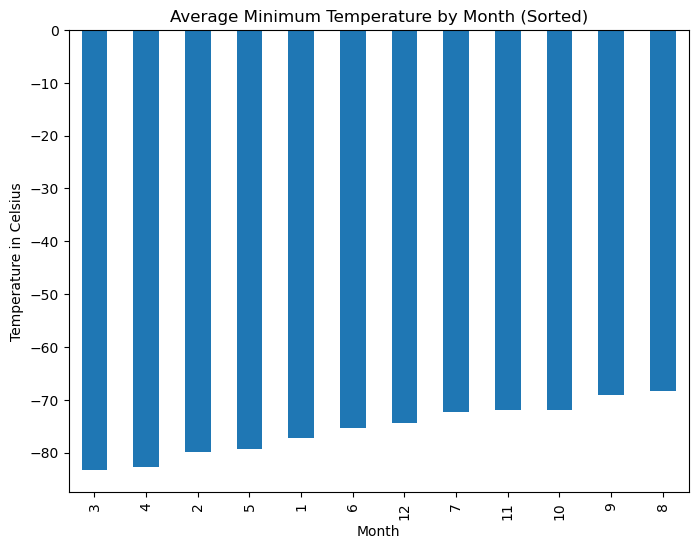

In [21]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
sorted_temp_by_month = average_min_temp_by_month.sort_values()
plt.figure(figsize=(8,6))
sorted_temp_by_month.plot(kind='bar')
plt.title('Average Minimum Temperature by Month (Sorted)')
plt.xlabel('Month')
plt.ylabel('Temperature in Celsius')
plt.show()

In [22]:
# 4. What is the average pressure by month?
average_pressure_by_month = mars_weather_df.groupby('month')['pressure'].mean()
average_pressure_by_month

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

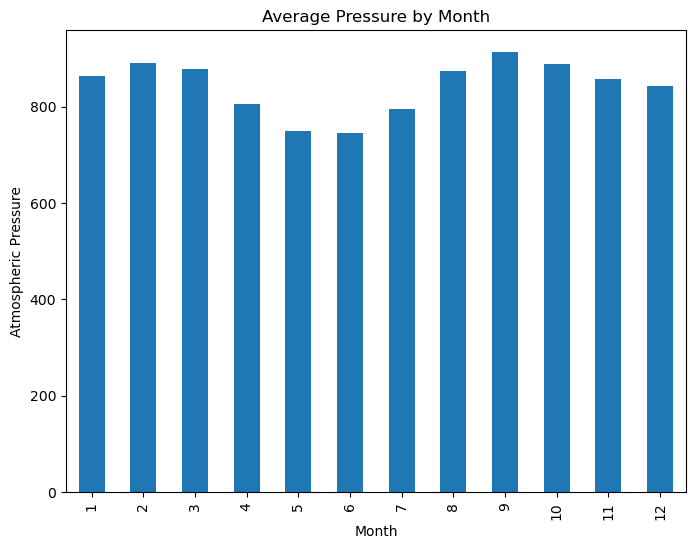

In [23]:
# Plot the average pressure by month
plt.figure(figsize=(8,6))
average_pressure_by_month.plot(kind='bar')
plt.title('Average Pressure by Month')
plt.xlabel('Month')
plt.ylabel('Atmospheric Pressure')
plt.show()

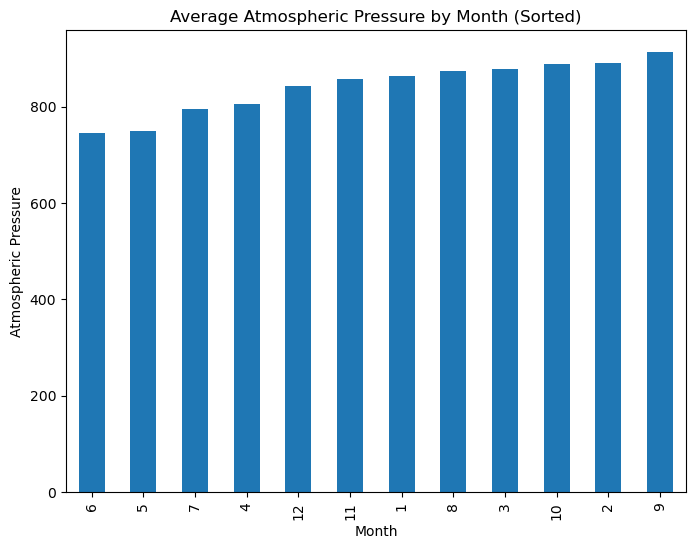

In [24]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
sorted_pressure_by_month = average_pressure_by_month.sort_values()
plt.figure(figsize=(8,6))
sorted_pressure_by_month.plot(kind='bar')
plt.title('Average Atmospheric Pressure by Month (Sorted)')
plt.xlabel('Month')
plt.ylabel('Atmospheric Pressure')
plt.show()

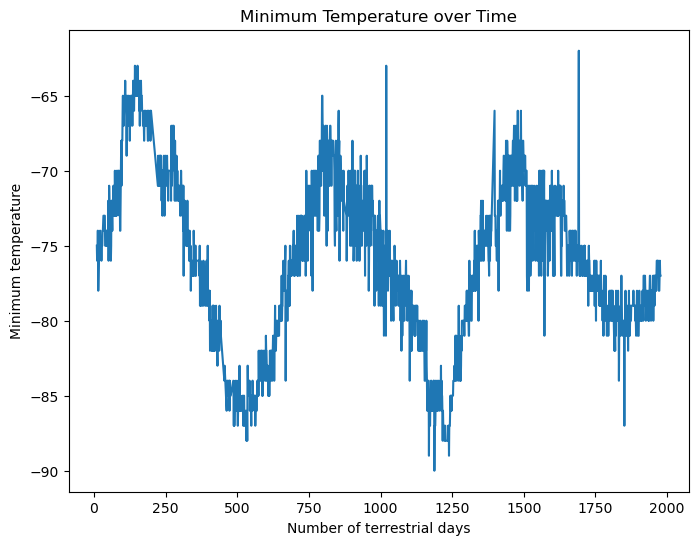

In [26]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
plt.figure(figsize=(8,6))
plt.plot(mars_weather_df['sol'], mars_weather_df['min_temp'])
plt.title('Minimum Temperature over Time')
plt.xlabel('Number of terrestrial days')
plt.ylabel('Minimum temperature')
plt.show()

#### Minimum Temperature

The plot of minimum temperature over time reveals clear periodic variations, which align with the Martian seasons. These fluctuations in temperature are expected due to Mars' elliptical orbit and the variation in solar radiation it receives at different points in its orbit.

Key Observations:
1. Temperature Cycles: The plot shows periodic cycles where the temperature rises and falls. Each cycle corresponds to a Martian year.
2. Range of Minimum Temperature: The minimum temperature varies from approximately -65°C to around -90°C, with the coldest temperatures occurring in the middle of each cycle.
3. Length of a Martian Year: By observing the time between similar points in the temperature cycle (such as two consecutive peaks or troughs), we can estimate the length of a Martian year to be roughly 700 to 750 terrestrial days.

Insights:
- Mars experiences significant temperature swings throughout the year due to its thin atmosphere and lack of oceans that can moderate temperatures, as seen by the minimum temperatures dropping to as low as -90°C.
- The coldest periods are likely during the Martian winter, with the warmer periods corresponding to the Martian summer.

This analysis provides an estimate of a Martian year based on temperature data, which seems to align with scientific estimates of about 687 Earth days per Martian year.


#### Atmospheric Pressure

The plot of average atmospheric pressure by month on Mars reveals important patterns that correspond to the planet's seasonal changes and atmospheric dynamics.

Key Observations:
1. Pressure Variation: Atmospheric pressure fluctuates significantly across the Martian year. The lowest pressures are observed around Month 6, while the highest pressures occur around Month 9.
2. Seasonal Influence: The variation in atmospheric pressure is largely driven by Mars' elliptical orbit and the sublimation of carbon dioxide at the poles:
    - During the colder seasons, carbon dioxide in the atmosphere freezes at the poles, lowering the total atmospheric pressure.
    -In warmer months, this frozen carbon dioxide sublimates (turns back into gas), increasing atmospheric pressure.
3. Pressure Extremes:
    - The lowest pressure occurs in Month 6, which likely corresponds to a colder period where carbon dioxide is frozen at the poles.
    - The highest pressure occurs in Month 9, likely during warmer periods when the frozen carbon dioxide sublimates and increases the atmospheric pressure.

Insights:
- Seasonal CO2 Cycle: The Martian atmosphere is largely composed of carbon dioxide, and the seasonal sublimation and deposition of this gas at the poles cause the observed pressure changes. During winter, atmospheric pressure drops as CO2 freezes at the poles, and it rises during the warmer months as CO2 sublimates.
- Implications for Curiosity's Operations: These pressure changes are critical for Curiosity’s operations and scientific measurements, as atmospheric pressure affects everything from temperature regulation to dust levels.


This analysis highlights the Martian climate's complexity and how atmospheric pressure is closely linked to seasonal cycles on the planet.

#### Year Length

By analyzing the minimum temperature over time, we can estimate the length of a Martian year in terrestrial days. This estimate is based on identifying repeating patterns of temperature fluctuations that correspond to seasonal changes on Mars.

Key Observations:
1. Temperature Cycle:
    - The plot shows periodic rises and falls in minimum temperature, which correspond to the progression of Martian seasons.
    - Each cycle from peak to peak (or trough to trough) represents one full Martian year.
2. Estimate of Martian Year Length:
    - From the plot, we can visually estimate the number of terrestrial days between two similar points in the temperature cycle (such as two peaks or two troughs).
    - The data suggests that one full Martian year takes approximately 687 Earth days (or around 700 days based on the visual estimation).
    - This estimate aligns with the known length of a Martian year, which is 687 Earth days.

Insights:
- Martian Year vs. Earth Year: A Martian year is nearly twice as long as an Earth year, due to Mars' greater distance from the Sun and its slower orbital speed.
- Seasonal Changes: The cyclic nature of the temperature data reflects the significant impact of seasonal changes on Mars. These changes influence not only temperature but also atmospheric pressure, as seen in the pressure analysis.


The visual estimation of the Martian year length from temperature data provides an intuitive understanding of how long a year lasts on Mars, as well as the seasonal patterns Curiosity must endure during its mission.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [27]:
# Write the data to a CSV
csv_file_path = 'mars_weather_data.csv'
mars_weather_df.to_csv(csv_file_path, index=False)
print(f"Data successfully saved to {csv_file_path}")

Data successfully saved to mars_weather_data.csv


In [28]:
browser.quit()